# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [12]:
app_train['YEARS_BIRTH'] = np.round(app_train['DAYS_BIRTH'] / 365) # day-age to year-age
app_train['YEARS_BIRTH'].value_counts()

39.0    9023
38.0    8793
37.0    8727
40.0    8602
41.0    8495
28.0    8467
32.0    8313
42.0    8308
43.0    8265
36.0    8152
44.0    8132
31.0    8021
30.0    7776
35.0    7751
33.0    7729
34.0    7659
29.0    7636
54.0    7489
45.0    7385
46.0    7333
47.0    7202
55.0    7140
53.0    7124
57.0    6926
48.0    6907
49.0    6786
52.0    6740
50.0    6696
56.0    6657
60.0    6612
59.0    6479
51.0    6417
27.0    6413
58.0    6371
61.0    5795
63.0    5467
62.0    5362
64.0    5023
26.0    4364
65.0    4318
25.0    4079
24.0    3815
23.0    3669
66.0    2641
22.0    1990
67.0    1834
68.0    1654
21.0     660
69.0     314
Name: YEARS_BIRTH, dtype: int64

In [24]:
app_train['YEARS_BINNED'] = pd.cut(app_train['YEARS_BIRTH'], bins = range(20, 71, 10)) 
print(app_train['YEARS_BINNED'].value_counts())


(30, 40]    82770
(40, 50]    75509
(50, 60]    67955
(20, 30]    48869
(60, 70]    32408
Name: YEARS_BINNED, dtype: int64


In [25]:
app_train['YEARS_BINNED'].value_counts().sort_index()

(20, 30]    48869
(30, 40]    82770
(40, 50]    75509
(50, 60]    67955
(60, 70]    32408
Name: YEARS_BINNED, dtype: int64

In [21]:
app_train.groupby('YEARS_BINNED').describe()  

AMT_ANNUITY                                                 \
                   count          mean           std     min        25%   
YEARS_BINNED                                                              
(20, 25]         14212.0  22031.279658  12808.263153  3415.5  11385.000   
(25, 30]         34654.0  26076.275726  13814.905832  2317.5  16011.000   
(30, 35]         39471.0  27462.941818  14448.658761  2781.0  16875.000   
(35, 40]         43296.0  28339.225298  14736.668526  2187.0  17674.875   
(40, 45]         40583.0  28866.533314  14873.622835  2844.0  18033.750   
(45, 50]         34922.0  28873.397343  14691.179055  1980.0  18261.000   
(50, 55]         34909.0  28107.812111  14648.317047  2052.0  17550.000   
(55, 60]         33044.0  26745.965985  14642.429960  1993.5  16321.500   
(60, 65]         25965.0  25040.133102  14109.936973  1615.5  15084.000   
(65, 70]          6443.0  17562.473304   6872.840587  2542.5  13270.500   

                                           AMT_CREDIT                ...   \
                  50%        75%       max      count           mean ...    
YEARS_BINNED                                                         ...    
(20, 25]      19980.0  29020.500  125059.5    14213.0  421589.139661 ...    
(25, 30]      24232.5  32821.875  225000.0    34656.0  513390.335267 ...    
(30, 35]      25537.5  34956.000  225000.0    39473.0  576483.709814 ...    
(35, 40]      26257.5  36054.000  225000.0    43297.0  630928.012414 ...    
(40, 45]      26532.0  36616.500  258025.5    40585.0  653365.932611 ...    
(45, 50]      26640.0  36751.500  225000.0    34924.0  666084.330289 ...    
(50, 55]      26041.5  35887.500  225000.0    34910.0  654213.638155 ...    
(55, 60]      23931.0  34155.000  230161.5    33045.0  635532.198956 ...    
(60, 65]      22500.0  31653.000  225000.0    25965.0  584791.012652 ...    
(65, 70]      16348.5  23364.000  225000.0     6443.0  240122.128124 ...    

             YEARS_BUILD_MEDI      YEARS_BUILD_MODE                           \
                          75%  max            count      mean       std  min   
YEARS_BINNED                                                                   
(20, 25]             0.825600  1.0           4432.0  0.757587  0.109096  0.0   
(25, 30]             0.832300  1.0          11168.0  0.763803  0.112863  0.0   
(30, 35]             0.825600  1.0          13091.0  0.766907  0.112957  0.0   
(35, 40]             0.820575  1.0          14464.0  0.763062  0.110167  0.0   
(40, 45]             0.812100  1.0          13704.0  0.755774  0.108098  0.0   
(45, 50]             0.825600  1.0          11761.0  0.754648  0.113624  0.0   
(50, 55]             0.825600  1.0          11725.0  0.759922  0.108085  0.0   
(55, 60]             0.825600  1.0          11015.0  0.760128  0.109159  0.0   
(60, 65]             0.812100  1.0           9176.0  0.753775  0.105556  0.0   
(65, 70]             0.805400  1.0           2487.0  0.749396  0.104245  0.0   

                                           
                 25%     50%     75%  max  
YEARS_BINNED                               
(20, 25]      0.6994  0.7583  0.8236  1.0  
(25, 30]      0.6994  0.7713  0.8301  1.0  
(30, 35]      0.6994  0.7713  0.8301  1.0  
(35, 40]      0.6994  0.7648  0.8236  1.0  
(40, 45]      0.6994  0.7583  0.8171  1.0  
(45, 50]      0.6929  0.7517  0.8236  1.0  
(50, 55]      0.6929  0.7648  0.8301  1.0  
(55, 60]      0.6994  0.7713  0.8301  1.0  
(60, 65]      0.6994  0.7648  0.8171  1.0  
(65, 70]      0.6929  0.7517  0.8105  1.0  

[10 rows x 880 columns]

C:\Users\acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


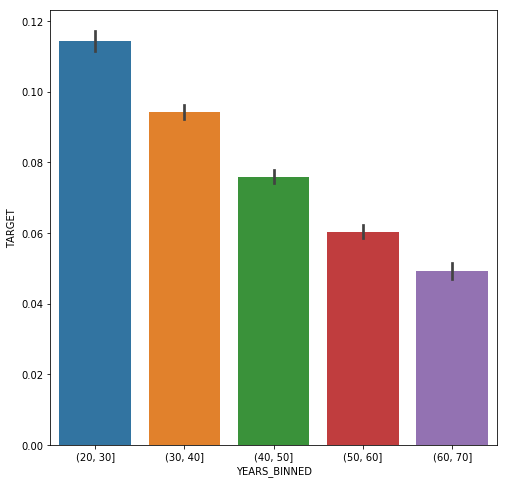

In [26]:
import seaborn as sns
plt.figure(figsize = (8, 8))

px = app_train['YEARS_BINNED']
py = app_train['TARGET']
sns.barplot(px, py)
